In [1]:
import pandas as pd

import numpy as np

df = pd.read_csv('ML-EdgeIIoT-dataset.csv', low_memory=False)

In [2]:
df.head(5)

print(df['Attack_type'].value_counts())

Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: Attack_type, dtype: int64


In [3]:
from sklearn.utils import shuffle

drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

df.isna().sum()

print(df['Attack_type'].value_counts())

Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64


In [4]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

In [5]:
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,dns.qry.name.len-_googlecast._tcp.local,mqtt.conack.flags-0,mqtt.conack.flags-0.0,mqtt.conack.flags-0x00000000,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
130973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0,0,1,0,0,1,0,0,1,0
137804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0,0,1,0,0,1,0,0,1,0
136452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0,0,1,0,0,1,0,0,1,0
53702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.378103e+08,9.378103e+08,...,0,0,1,0,0,1,0,0,1,0
5142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.561770e+05,2.663220e+08,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0,0,1,0,0,1,0,0,1,0
49684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.599960e+09,1.599960e+09,...,0,0,1,0,0,1,0,0,1,0
46076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.210000e+02,9.884602e+08,...,0,0,1,0,0,1,0,0,1,0
139043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0,0,1,0,0,1,0,0,1,0


In [6]:
df = df[~(df['Attack_type'] == 'DDoS_HTTP')]

In [7]:
df = df[~(df['Attack_type'] == 'DDoS_TCP')]

In [8]:
df = df[~(df['Attack_type'] == 'Fingerprinting')]
df = df[~(df['Attack_type'] == 'Password')]
df = df[~(df['Attack_type'] == 'Uploading')]

In [9]:
df['Attack_type'].value_counts()

Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
SQL_injection            10282
Vulnerability_scanner    10062
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
MITM                       358
Name: Attack_type, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110415 entries, 130973 to 145576
Data columns (total 76 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   arp.opcode                                                                         110415 non-null  float64
 1   arp.hw.size                                                                        110415 non-null  float64
 2   icmp.checksum                                                                      110415 non-null  float64
 3   icmp.seq_le                                                                        110415 non-null  float64
 4   icmp.unused                                                                        110415 non-null  float64
 5   http.content_length                                                                11041

In [11]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'icmp.unused',
 'http.content_length',
 'http.response',
 'http.tls_port',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.qry.type',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msg_decoded_as',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }',
 'htt

In [12]:
len(feat_cols)

75

In [13]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [16]:
df[skip_list[3]].value_counts()

0.0    110415
Name: mqtt.msg_decoded_as, dtype: int64

In [17]:
df.drop(skip_list, axis=1, inplace=True)
feat_cols = list(df.columns)
feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'http.content_length',
 'http.response',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }',
 'http.referer-0',
 'http.referer-0.0',
 'http.referer-127.0.0.1',
 'http.reques

In [18]:
X = df.drop([label_col], axis=1)
y = df[label_col]

del df

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [20]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [21]:
label_encoder.classes_

array(['Backdoor', 'DDoS_ICMP', 'DDoS_UDP', 'MITM', 'Normal',
       'Port_Scanning', 'Ransomware', 'SQL_injection',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [22]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(71,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [24]:
model.save_weights('./checkpoints/') # to save weights in the middle of a session

In [25]:
# Compiling the model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [26]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
# fitting the model
model.fit(X_train, y_train, epochs=50, batch_size=256)

Epoch 1/50
346/346 [==============================] - 1s 3ms/step - loss: 0.0996 - accuracy: 0.9653
Epoch 2/50
346/346 [==============================] - 1s 3ms/step - loss: 0.1078 - accuracy: 0.9624
Epoch 3/50
346/346 [==============================] - 1s 3ms/step - loss: 0.1013 - accuracy: 0.9651
Epoch 4/50
346/346 [==============================] - 1s 3ms/step - loss: 0.0980 - accuracy: 0.9653
Epoch 5/50
346/346 [==============================] - 1s 3ms/step - loss: 0.0976 - accuracy: 0.9656
Epoch 6/50
346/346 [==============================] - 1s 3ms/step - loss: 0.1101 - accuracy: 0.9618
Epoch 7/50
346/346 [==============================] - 1s 3ms/step - loss: 0.0978 - accuracy: 0.9657
Epoch 8/50
346/346 [==============================] - 1s 3ms/step - loss: 0.0946 - accuracy: 0.9662
Epoch 9/50
346/346 [==============================] - 2s 5ms/step - loss: 0.0948 - accuracy: 0.9662
Epoch 10/50
346/346 [==============================] - 1s 4ms/step - loss: 0.0928 - accuracy: 0.9665

In [29]:
model.save('Weights/Model_1')  # to save weights as an entire weights

INFO:tensorflow:Assets written to: Weights/Model_1\assets


In [30]:
model.evaluate(X_test, y_test,256)

87/87 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9683


[0.09005013853311539, 0.9683467149734497]

In [31]:
y_pred = model.predict(X_test,256)
y_pred = np.argmax(y_pred,axis = 1)
y_pred

array([4, 9, 4, ..., 0, 2, 8], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.96834669202554

In [35]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[1829    0    0    0    0   46   98    0    0    0]
 [   0 2619    0    0    0    0    0    0    0    0]
 [   0    0 2900    0    0    0    0    0    0    0]
 [   0    0    0   72    0    0    0    0    0    0]
 [   0    0    0    0 4820    0    0    0    0    0]
 [   0    0    0    0    0 1781    3    0    0    0]
 [   2    0    0    0    0   64 1872    0    0    0]
 [   0    0    0    0    0    0    0 2056    0    0]
 [   0    0    0    0    0    0    0    0 1695  317]
 [   0    0    0    0    0    0    0    0  169 1740]]


Confusion Matrix


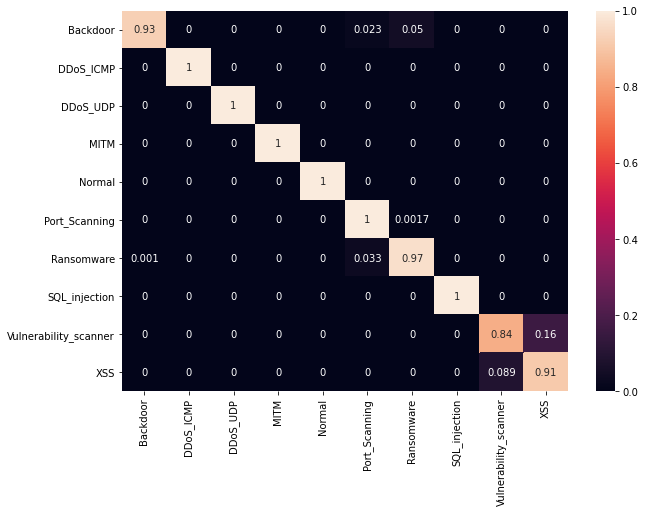

In [36]:
print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                    columns = [i for i in label_encoder.classes_])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [45]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='weighted')

0.9691278503425989

In [46]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred, average='weighted')

0.96834669202554

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='weighted')

0.9683220893884725